In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('df_total.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = data['news']
print(X.shape)
y = data['Type']
print(y.shape)

# Tokenización y división de los datos
vectorizador = CountVectorizer()  # Creamos un objeto CountVectorizer
X = vectorizador.fit_transform(X)  # Tokenizamos y convertimos el texto en una matriz de características


(1217,)
(1217,)


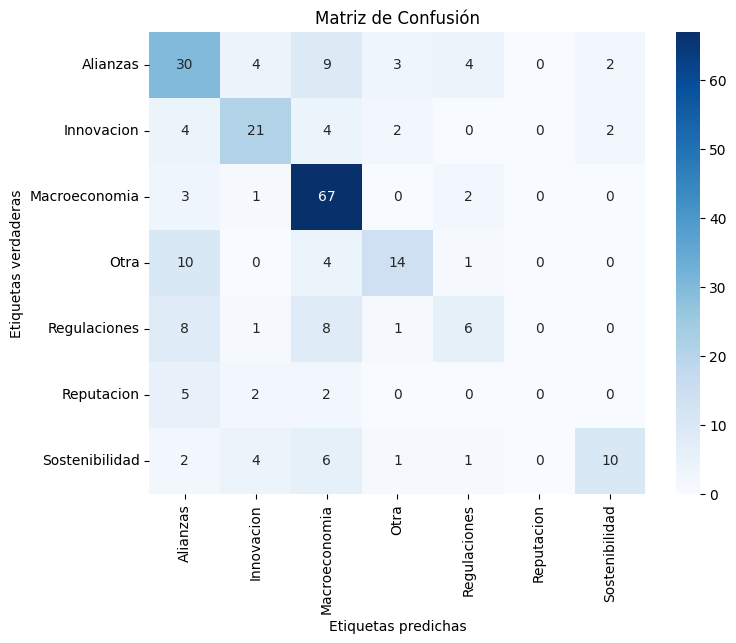

Precisión del clasificador KNN:  60.65573770491803 %


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba y calcular la precisión
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()
print("Precisión del clasificador KNN: ", accuracy * 100, "%")


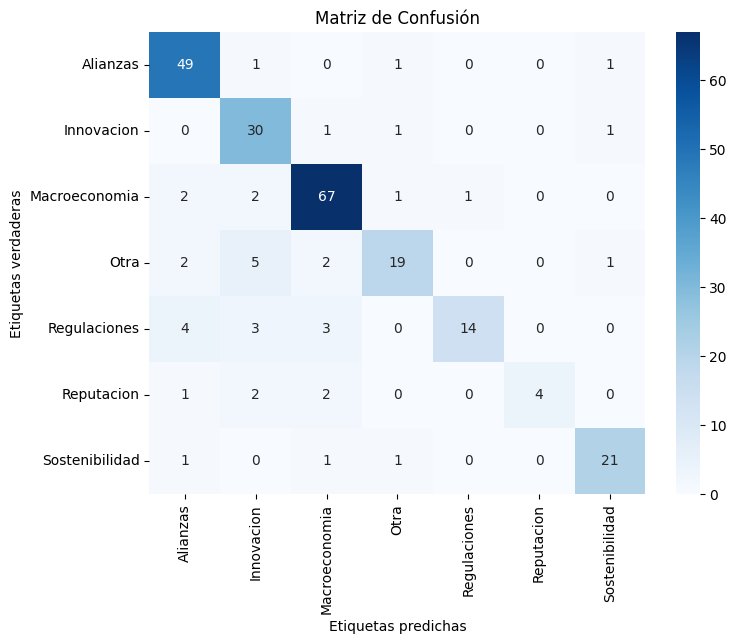

Precisión del clasificador MLP:  83.60655737704919 %


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPClassifier
# Crear y entrenar el modelo MLP
modelo = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()
print("Precisión del clasificador MLP: ", accuracy * 100, "%")

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Definimos los documentos de texto
documentos = [
    "El perro ladra y canta y además grita.",
    "El gato maulla.",
    "El pájaro canta."
]

# Creamos un objeto CountVectorizer
vectorizador = CountVectorizer()

# Tokenizamos y convertimos el texto en una matriz de características
X = vectorizador.fit_transform(documentos)

# Imprimimos las palabras únicas
print(vectorizador.get_feature_names_out())
print(X.toarray())


['además' 'canta' 'el' 'gato' 'grita' 'ladra' 'maulla' 'perro' 'pájaro']
[[1 1 1 0 1 1 0 1 0]
 [0 0 1 1 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 1]]
